# BÀI THỰC HÀNH 3: MẠNG NEURAL HỒI QUY CHO BÀI TOÁN PHÂN LOẠI VĂN BẢN VÀ GÁN NHÃN CHUỖI

# EDA and Preprocessing

## UIT-VSFC

In [ ]:
!pip install gdown --upgrade --quiet

url = 'https://drive.google.com/drive/folders/1rdcXNGt_3-QUvV8EtSvVsLMVeHmk6Yqk'
output_folder = 'UIT-VSFC'

!gdown "{url}" -O "{output_folder}" --folder

import os

Retrieving folder contents
Processing file 1UWbzHFeUPu4AuofOEy0Fo0SFotVZHzUe UIT-VSFC-dev.json
Processing file 1g4imdabNbswIu91K6zKFGalkjDBBqaQq UIT-VSFC-test.json
Processing file 1eJdEStCQBf3GtbOIQfIR2iS-Wb3nlfJX UIT-VSFC-train.json
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1UWbzHFeUPu4AuofOEy0Fo0SFotVZHzUe
To: /content/UIT-VSFC/UIT-VSFC-dev.json
100% 274k/274k [00:00<00:00, 88.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g4imdabNbswIu91K6zKFGalkjDBBqaQq
To: /content/UIT-VSFC/UIT-VSFC-test.json
100% 559k/559k [00:00<00:00, 81.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eJdEStCQBf3GtbOIQfIR2iS-Wb3nlfJX
To: /content/UIT-VSFC/UIT-VSFC-train.json
100% 2.02M/2.02M [00:00<00:00, 214MB/s]
Download completed


In [ ]:
!ls -R UIT-VSFC

UIT-VSFC:
UIT-VSFC-dev.json  UIT-VSFC-test.json  UIT-VSFC-train.json


In [ ]:
import pandas as pd

def load_uit_vsfc_json(data_type):
    file_path = f'/content/UIT-VSFC/UIT-VSFC-{data_type}.json'

    try:
        df = pd.read_json(file_path)
        return df
    except ValueError:
        print(f"Lỗi định dạng JSON hoặc không tìm thấy file: {file_path}")
        return None
    except Exception as e:
        print(f"Lỗi: {e}")
        return None

# 1. Tải dữ liệu
df_train = load_uit_vsfc_json('train')
df_dev = load_uit_vsfc_json('dev')   # Tương ứng với valid
df_test = load_uit_vsfc_json('test')

# 2. Kiểm tra cấu trúc dữ liệu vừa tải
if df_train is not None:
    print("\n--- 5 dòng đầu tiên ---")
    print(df_train.head())
    print("\n--- Tên các cột hiện có ---")
    print(df_train.columns)


--- 5 dòng đầu tiên ---
                                            sentence sentiment  \
0                          slide giáo trình đầy đủ .  positive   
1     nhiệt tình giảng dạy , gần gũi với sinh viên .  positive   
2               đi học đầy đủ full điểm chuyên cần .  negative   
3  chưa áp dụng công nghệ thông tin và các thiết ...  negative   
4  thầy giảng bài hay , có nhiều bài tập ví dụ ng...  positive   

              topic  
0  training_program  
1          lecturer  
2  training_program  
3          lecturer  
4          lecturer  

--- Tên các cột hiện có ---
Index(['sentence', 'sentiment', 'topic'], dtype='object')


In [ ]:
def standardize_columns(df):
    # Đảm bảo chỉ giữ lại cột cần thiết
    if 'sentence' in df.columns and 'sentiment' in df.columns:
        return df[['sentence', 'sentiment']]
    else:
        print("Không tìm thấy cột 'sentence' hoặc 'sentiment'")
        return df

# Áp dụng chuẩn hóa
df_train = standardize_columns(df_train)
df_dev = standardize_columns(df_dev)
df_test = standardize_columns(df_test)

print("\n--- Dữ liệu sau khi chuẩn hóa ---")
print(df_train.head())


--- Dữ liệu sau khi chuẩn hóa ---
                                            sentence sentiment
0                          slide giáo trình đầy đủ .  positive
1     nhiệt tình giảng dạy , gần gũi với sinh viên .  positive
2               đi học đầy đủ full điểm chuyên cần .  negative
3  chưa áp dụng công nghệ thông tin và các thiết ...  negative
4  thầy giảng bài hay , có nhiều bài tập ví dụ ng...  positive


label_id
0    5325
1     458
2    5643
Name: count, dtype: int64


/tmp/ipython-input-3208082383.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_id', data=df_train, palette='viridis', order=[0, 1, 2])


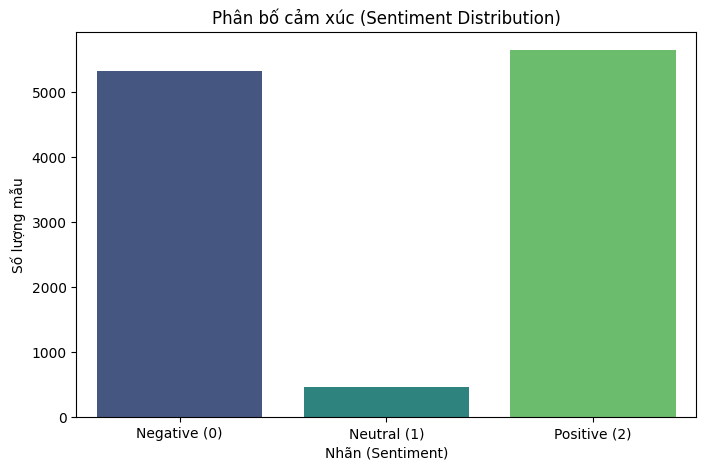

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ánh xạ chuỗi sang số (Label Encoding)
label_mapping = {
    'negative': 0,
    'neutral': 1,
    'positive': 2,
}

df_train['label_id'] = df_train['sentiment'].map(label_mapping)

# Kiểm tra NaN
if df_train['label_id'].isnull().sum() > 0:
    print(df_train[df_train['label_id'].isnull()]['sentiment'].unique())

print(df_train['label_id'].value_counts().sort_index())


plt.figure(figsize=(8, 5))

sns.countplot(x='label_id', data=df_train, palette='viridis', order=[0, 1, 2])

plt.title('Phân bố cảm xúc (Sentiment Distribution)')
plt.xlabel('Nhãn (Sentiment)')
plt.ylabel('Số lượng mẫu')
plt.xticks(ticks=[0, 1, 2], labels=['Negative (0)', 'Neutral (1)', 'Positive (2)'])
plt.show()

Dữ liệu tồn tại mất cân bằng nhãn

count    11426.000000
mean        14.308769
std         10.089727
min          2.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        159.000000
Name: word_count, dtype: float64


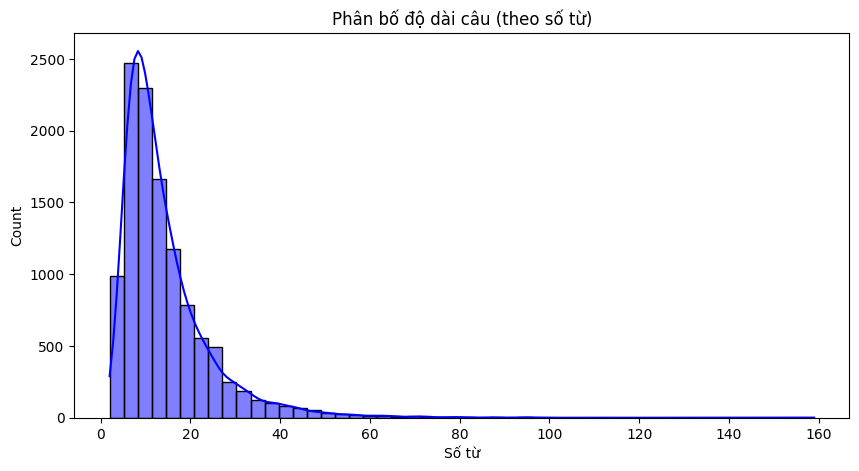

Độ dài bao phủ 95% dữ liệu là: 33 từ.


In [ ]:
# 1. Tính số từ (words) trong mỗi câu
df_train['word_count'] = df_train['sentence'].astype(str).apply(lambda x: len(x.split()))

# 2. Thống kê
print(df_train['word_count'].describe())

# 3. Vẽ biểu đồ phân bố độ dài
plt.figure(figsize=(10, 5))
sns.histplot(df_train['word_count'], bins=50, kde=True, color='blue')
plt.title('Phân bố độ dài câu (theo số từ)')
plt.xlabel('Số từ')
plt.show()

# 4. Tìm Max Length bao phủ 95% dữ liệu
percentile_95 = df_train['word_count'].quantile(0.95)
print(f"Độ dài bao phủ 95% dữ liệu là: {int(percentile_95)} từ.")

In [ ]:
from collections import Counter

# Gom toàn bộ câu thành 1 chuỗi lớn rồi tách từ
all_text = " ".join(df_train['sentence'].astype(str))
all_words = all_text.split()

# Đếm tần suất
vocab_counter = Counter(all_words)

print(f"\nTổng số từ vựng (Unique Tokens): {len(vocab_counter)}")
print("--- Top 20 từ xuất hiện nhiều nhất ---")
print(vocab_counter.most_common(20))


Tổng số từ vựng (Unique Tokens): 2514
--- Top 20 từ xuất hiện nhiều nhất ---
[('.', 11009), (',', 6827), ('viên', 4803), ('giảng', 3711), ('dạy', 3156), ('thầy', 3095), ('sinh', 3082), ('học', 2940), ('bài', 2336), ('tình', 2266), ('không', 2177), ('và', 2068), ('có', 2031), ('rất', 1961), ('nhiệt', 1931), ('cho', 1735), ('hiểu', 1730), ('nhiều', 1622), ('tập', 1454), ('dễ', 1438)]




1.   Nhiễu về dấu, ví dụ dấu chấm, dấu phẩy
2.   Từ ghép (VD: Giảng viên) bị tách thành 'giảng' và 'viên'
3.   Loại bỏ các hư từ không có ý nghĩa nhiều, ví dụ: 'và', 'có',...
4.   Giữ lại từ 'không' và các từ phủ định tương tự.



In [ ]:
!pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.9 MB/s eta 0:00:00


In [ ]:
import re
from pyvi import ViTokenizer

# Danh sách stopwords tiếng Việt cơ bản (ĐÃ LOẠI BỎ từ 'không', 'chả' để giữ ngữ nghĩa phủ định)
# Bạn có thể bổ sung thêm nếu thấy rác nhiều
STOPWORDS = set([
    'bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện',
    'cùng', 'cũng', 'cứ', 'của', 'đã', 'đang', 'đây', 'để', 'đến', 'điều', 'đó', 'được', 'dưới',
    'gì', 'khi', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một', 'này', 'nên', 'nếu', 'ngay',
    'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rất', 'rồi', 'sau',
    'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào',
    'vậy', 'vì', 'việc', 'với', 'vừa'
])

def preprocess_pipeline(text):
    if not isinstance(text, str): return ""

    # 1. Chuyển về chữ thường
    text = text.lower()

    # 2. Xóa ký tự đặc biệt và dấu câu (.,!?...) chỉ giữ lại chữ cái và số
    # Regex này sẽ thay thế tất cả dấu chấm, phẩy, ngoặc... bằng khoảng trắng
    text = re.sub(r'[^\w\s]', ' ', text)

    # 3. Tách từ (Word Segmentation) -> Quan trọng nhất
    # "giảng viên nhiệt tình" -> "giảng_viên nhiệt_tình"
    text = ViTokenizer.tokenize(text)

    # 4. Xóa Stopwords (nhưng giữ lại "không")
    tokens = text.split()
    tokens = [word for word in tokens if word not in STOPWORDS]

    # 5. Nối lại thành câu
    return " ".join(tokens)

# Câu ví dụ chứa các trường hợp: Dấu câu, từ ghép, từ phủ định, stopwords
test_sent = "Giảng viên dạy rất nhiệt tình, và sinh viên không cảm thấy chán!!!"

print(f"Gốc: {test_sent}")
print(f"Xử lý: {preprocess_pipeline(test_sent)}")

Gốc: Giảng viên dạy rất nhiệt tình, và sinh viên không cảm thấy chán!!!
Xử lý: giảng_viên dạy nhiệt_tình sinh_viên không cảm_thấy chán


In [ ]:
df_train['sentence_clean'] = df_train['sentence'].apply(preprocess_pipeline)

print("\n Before & After")
print(df_train[['sentence', 'sentence_clean']].head())


 Before & After
                                            sentence  \
0                          slide giáo trình đầy đủ .   
1     nhiệt tình giảng dạy , gần gũi với sinh viên .   
2               đi học đầy đủ full điểm chuyên cần .   
3  chưa áp dụng công nghệ thông tin và các thiết ...   
4  thầy giảng bài hay , có nhiều bài tập ví dụ ng...   

                                      sentence_clean  
0                            slide giáo_trình đầy_đủ  
1             nhiệt_tình giảng_dạy gần_gũi sinh_viên  
2                 đi học đầy_đủ full điểm chuyên_cần  
3  áp_dụng công_nghệ thông_tin thiết_bị hỗ_trợ gi...  
4      thầy giảng bài hay có nhiều bài_tập ví_dụ lớp  


In [ ]:
# Chạy thống kê 1 lần nữa

all_text = " ".join(df_train['sentence_clean'].astype(str))
all_words = all_text.split()

vocab_counter = Counter(all_words)

print(f"\nTổng số từ vựng (Unique Tokens): {len(vocab_counter)}")
print("--- Top 20 từ xuất hiện nhiều nhất ---")
print(vocab_counter.most_common(20))


Tổng số từ vựng (Unique Tokens): 3674
--- Top 20 từ xuất hiện nhiều nhất ---
[('thầy', 3073), ('sinh_viên', 2680), ('dạy', 2161), ('không', 2048), ('nhiệt_tình', 1824), ('có', 1716), ('hiểu', 1653), ('nhiều', 1621), ('giảng_viên', 1609), ('học', 1345), ('dễ', 1277), ('cô', 1176), ('bài', 1125), ('giảng', 1098), ('bài_tập', 1048), ('hơn', 979), ('em', 974), ('giảng_dạy', 952), ('hay', 928), ('kiến_thức', 898)]


In [ ]:
# Sau khi xem lại kết quả tiền xử lý tập train đã ổn, thực hiện tương tự với dev và test.
df_dev['sentence_clean'] = df_dev['sentence'].apply(preprocess_pipeline)

df_test['sentence_clean'] = df_test['sentence'].apply(preprocess_pipeline)

print("\n- sample tập Test")
print(df_test[['sentence', 'sentence_clean']].sample(1).iloc[0])


- sample tập Test
sentence          thầy cố gắng nên cho giải bài tập nhiều hơn .
sentence_clean              thầy cố_gắng giải bài_tập nhiều hơn
Name: 567, dtype: object


## PhoNER

In [2]:
# 1. Clone dữ liệu từ GitHub
!git clone https://github.com/VinAIResearch/PhoNER_COVID19.git

import json
import pandas as pd
import os

Cloning into 'PhoNER_COVID19'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 61 (delta 24), reused 41 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 3.61 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [3]:
import json

def load_phoner(file_path):
    sentences = []
    labels = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if not line.strip():
                continue

            try:
                data = json.loads(line)
                sentences.append(data['words'])
                labels.append(data['tags'])
            except json.JSONDecodeError:
                continue # Bỏ qua dòng lỗi nếu có

    return sentences, labels

base_path = 'PhoNER_COVID19/data/word'

train_sents, train_labels = load_phoner(f'{base_path}/train_word.json')
dev_sents, dev_labels = load_phoner(f'{base_path}/dev_word.json')
test_sents, test_labels = load_phoner(f'{base_path}/test_word.json')

print(f"Số lượng train: {len(train_sents)}")

Số lượng train: 5027


In [4]:
# In 3 mẫu đầu tiên để xem cấu trúc BIO
for i in range(3):
    print(f"Sample {i+1}:")
    # Zip lại để in cặp Từ - Nhãn cho dễ nhìn
    # Dùng format string để canh lề
    for word, tag in zip(train_sents[i][:15], train_labels[i][:15]):
        print(f"{word:15} | {tag}")
    print("..." if len(train_sents[i]) > 15 else "")
    print("-" * 30)

Sample 1:
Đồng_thời       | O
,               | O
bệnh_viện       | O
tiếp_tục        | O
thực_hiện       | O
các             | O
biện_pháp       | O
phòng_chống     | O
dịch_bệnh       | O
COVID           | O
-               | O
19              | O
theo            | O
hướng_dẫn       | O
của             | O
...
------------------------------
Sample 2:
"               | O
Số              | O
bệnh_viện       | O
có_thể          | O
tiếp_nhận       | O
bệnh_nhân       | O
bị              | O
sốt             | B-SYMPTOM_AND_DISEASE
cao             | I-SYMPTOM_AND_DISEASE
và              | O
khó             | B-SYMPTOM_AND_DISEASE
thở             | I-SYMPTOM_AND_DISEASE
đang            | O
giảm            | O
dần             | O
...
------------------------------
Sample 3:
Ngoài_ra        | O
,               | O
những           | O
người           | O
tiếp_xúc        | O
gián_tiếp       | O
(               | O
đã              | O
gặp             | O
những           | O
người           | O


In [5]:
def get_stats(name, sents):
    num_sents = len(sents)
    # Tổng số token = tổng độ dài các câu
    num_tokens = sum(len(s) for s in sents)
    return num_sents, num_tokens

print(f"{'Dataset':<10} | {'Số câu':<10} | {'Tổng số Token':<15}")
print("-" * 40)

datasets = [('Train', train_sents), ('Dev', dev_sents), ('Test', test_sents)]
for name, sents in datasets:
    n_sents, n_tokens = get_stats(name, sents)
    print(f"{name:<10} | {n_sents:<10} | {n_tokens:<15}")

Dataset    | Số câu     | Tổng số Token  
----------------------------------------
Train      | 5027       | 132511         
Dev        | 2000       | 56283          
Test       | 3000       | 85678          


O: 104750
B-LOCATION: 5398
I-LOCATION: 5242
B-PATIENT_ID: 3240
B-DATE: 2549
I-ORGANIZATION: 2545
I-DATE: 2500
I-SYMPTOM_AND_DISEASE: 1552
B-SYMPTOM_AND_DISEASE: 1439
B-ORGANIZATION: 1137
B-AGE: 682
B-GENDER: 542
B-NAME: 349
B-TRANSPORTATION: 226
B-JOB: 205
I-TRANSPORTATION: 67
I-JOB: 62
I-NAME: 13
I-PATIENT_ID: 11
I-AGE: 2


/tmp/ipython-input-3035011390.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette='viridis')


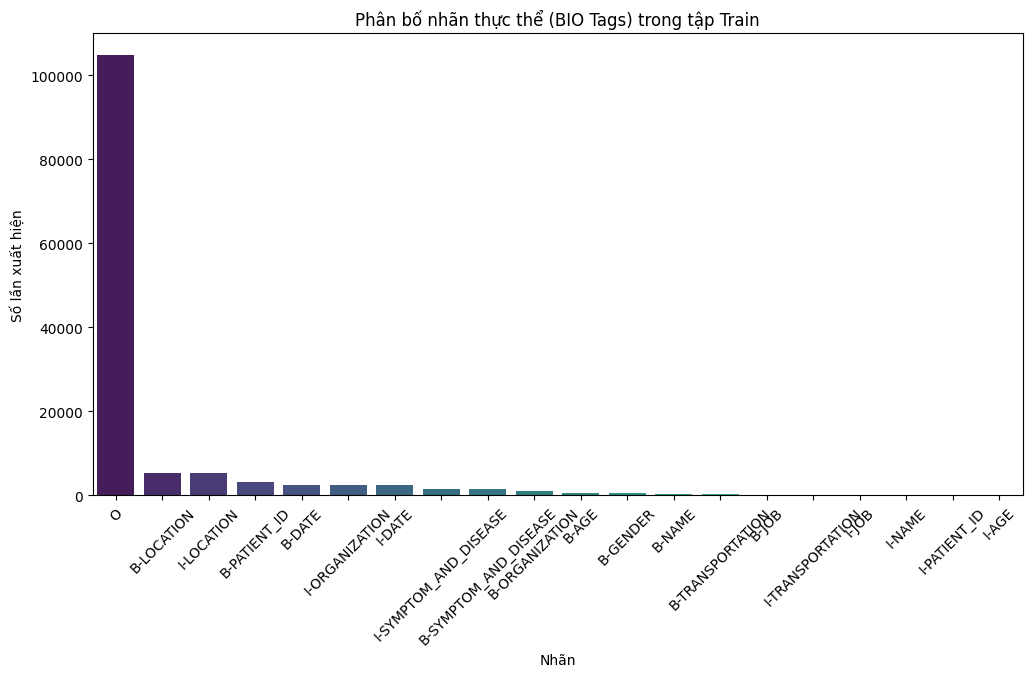

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# gom tất cả các nhãn thành 1 list phẳng
all_tags = [tag for sent_tags in train_labels for tag in sent_tags]

tag_counts = Counter(all_tags)
sorted_tags = tag_counts.most_common()

# Tách ra để vẽ
labels, values = zip(*sorted_tags)

for label, count in sorted_tags:
    print(f"{label}: {count}")

plt.figure(figsize=(12, 6))
sns.barplot(x=list(labels), y=list(values), palette='viridis')
plt.title('Phân bố nhãn thực thể (BIO Tags) trong tập Train')
plt.xticks(rotation=45)
plt.xlabel('Nhãn')
plt.ylabel('Số lần xuất hiện')
plt.show()

Nhãn xuất hiện nhiều nhất:
O: 104750

Nhãn xuất hiện hiếm gồm:
B-AGE: 682
B-GENDER: 542
B-NAME: 349
B-TRANSPORTATION: 226
B-JOB: 205
I-TRANSPORTATION: 67
I-JOB: 62
I-NAME: 13
I-PATIENT_ID: 11
I-AGE: 2

/tmp/ipython-input-84377333.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(l_filt), y=list(v_filt), palette='magma')


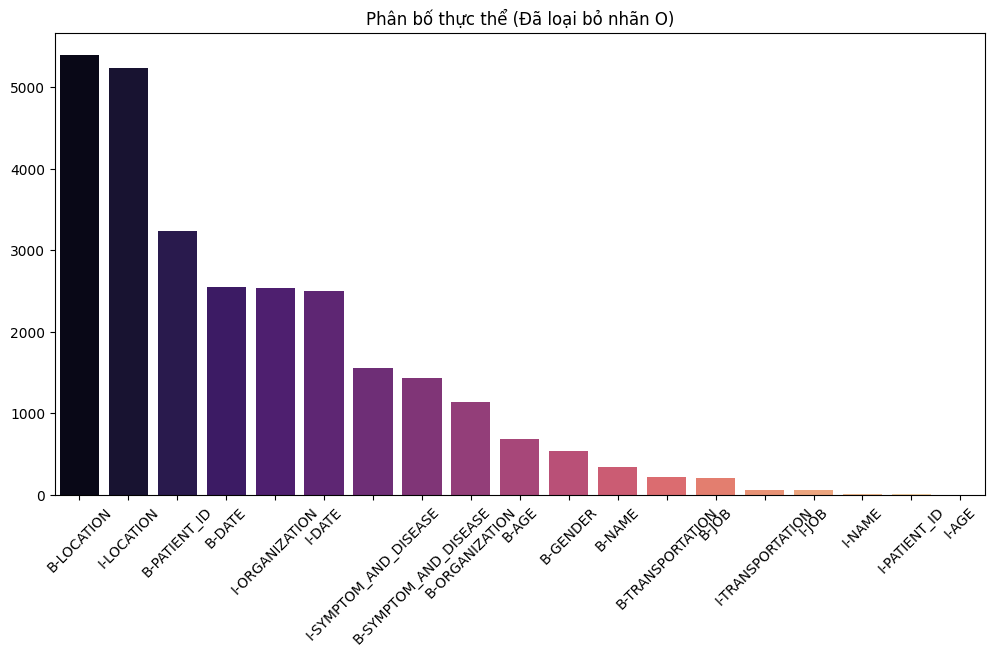

In [7]:
# Vì nhãn 'O' quá cao, không thấy các cột khác
filtered_tags = {k: v for k, v in tag_counts.items() if k != 'O'}
if filtered_tags:
    sorted_filtered = sorted(filtered_tags.items(), key=lambda x: x[1], reverse=True)
    l_filt, v_filt = zip(*sorted_filtered)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(l_filt), y=list(v_filt), palette='magma')
    plt.title('Phân bố thực thể (Đã loại bỏ nhãn O)')
    plt.xticks(rotation=45)
    plt.show()

Min length : 6
Max length : 161
Mean length: 26.36
Độ dài bao phủ 95% dữ liệu: 50.0
Độ dài bao phủ 99% dữ liệu: 65.0


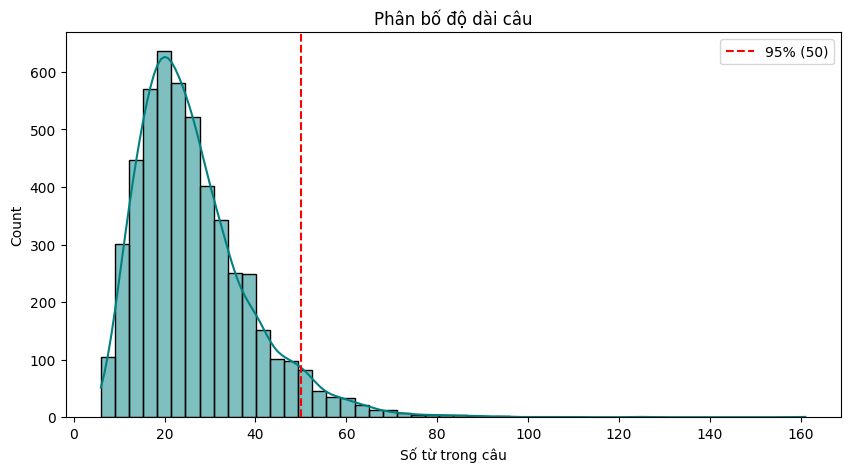

In [8]:
import numpy as np

sent_lengths = [len(s) for s in train_sents]


print(f"Min length : {np.min(sent_lengths)}")
print(f"Max length : {np.max(sent_lengths)}")
print(f"Mean length: {np.mean(sent_lengths):.2f}")

percentile_95 = np.percentile(sent_lengths, 95)
percentile_99 = np.percentile(sent_lengths, 99)
print(f"Độ dài bao phủ 95% dữ liệu: {percentile_95}")
print(f"Độ dài bao phủ 99% dữ liệu: {percentile_99}")

plt.figure(figsize=(10, 5))
sns.histplot(sent_lengths, bins=50, kde=True, color='teal')
plt.title('Phân bố độ dài câu')
plt.xlabel('Số từ trong câu')
plt.axvline(x=percentile_95, color='r', linestyle='--', label=f'95% ({int(percentile_95)})')
plt.legend()
plt.show()

### Bài 1: Xây dựng mạng LSTM gồm 5 lớp với hidden size là 256 cho bài toán phân loại văn bản. Huấn luyện mô hình này trên bộ dữ liệu UIT-VSFC (Vietnamese Student Feedback Corpus) sử dụng Adam làm phương thức tối ưu tham số và đánh giá độ hiệu quả của mô hình sử dụng độ đo F1.

In [ ]:
pip install torch scikit-learn

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import numpy as np

label_mapping = {
    'negative': 0,
    'neutral': 1,
    'positive': 2,
}

df_train['label_id'] = df_train['sentiment'].map(label_mapping)
df_dev['label_id'] = df_dev['sentiment'].map(label_mapping)
df_test['label_id'] = df_test['sentiment'].map(label_mapping)

print(f"Train label_id check: {df_train['label_id'].head(3).tolist()}")
print(f"Số lượng NaN trong Train: {df_train['label_id'].isnull().sum()}")

# xóa các dòng NaN
df_train = df_train.dropna(subset=['label_id'])
df_dev = df_dev.dropna(subset=['label_id'])
df_test = df_test.dropna(subset=['label_id'])

df_train['label_id'] = df_train['label_id'].astype(int)
df_dev['label_id'] = df_dev['label_id'].astype(int)
df_test['label_id'] = df_test['label_id'].astype(int)

# Hyperparameters
MAX_LEN = 33
BATCH_SIZE = 64

# 1. Vocabulary từ tập Train
def build_vocab(sentences):
    words = " ".join(sentences).split()
    counter = Counter(words)

    sorted_words = sorted(counter, key=counter.get, reverse=True)

    # mapping: word -> index
    # index 0 dành cho padding, index 1 dành cho từ unknown
    vocab = {word: i+2 for i, word in enumerate(sorted_words)}
    vocab['<pad>'] = 0
    vocab['<unk>'] = 1
    return vocab

vocab = build_vocab(df_train['sentence_clean'].tolist())
vocab_size = len(vocab)
print(f"Kích thước: {vocab_size}")

class VSFC_Dataset(Dataset):
    def __init__(self, df, vocab, max_len):
        self.sentences = df['sentence_clean'].tolist()
        self.labels = df['label_id'].tolist()
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sent = self.sentences[idx]
        label = self.labels[idx]

        # Tokenize & Encode
        words = str(sent).split()
        # Mapping, không có thì index <unk> (1)
        indices = [self.vocab.get(w, 1) for w in words]

        # Padding/ Truncating
        if len(indices) < self.max_len:
            # Nếu ngắn hơn thì thêm số 0 vào cuối
            indices = indices + [0] * (self.max_len - len(indices))
        else:
            # Nếu dài hơn thì cắt bớt
            indices = indices[:self.max_len]

        return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)

train_ds = VSFC_Dataset(df_train, vocab, MAX_LEN)
dev_ds = VSFC_Dataset(df_dev, vocab, MAX_LEN)
test_ds = VSFC_Dataset(df_test, vocab, MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = DataLoader(dev_ds, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

Train label_id check: [2, 2, 0]
Số lượng NaN trong Train: 0
Kích thước: 3676


In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()

        # Layer 1: Embedding
        # Chuyển index thành vector dày đặc (dense vector)
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Layer 2: LSTM
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=True, # Thường dùng 2 chiều để hiệu quả hơn
                            dropout=dropout if n_layers > 1 else 0,
                            batch_first=True)

        # Layer 3: Fully Connected, bidirectional
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text shape: [batch_size, sent_len]

        embedded = self.dropout(self.embedding(text))
        # embedded shape: [batch_size, sent_len, emb_dim]

        # output: chứa hidden state của tất cả time steps
        # hidden: chứa hidden state của bước cuối cùng (của lớp cuối cùng)
        output, (hidden, cell) = self.lstm(embedded)

        # Lấy hidden state cuối cùng của 2 chiều (forward & backward) nối lại
        # hidden shape: [num_layers * num_directions, batch, hidden_dim]
        hidden_last = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

        return self.fc(self.dropout(hidden_last))

# --- Khởi tạo mô hình ---
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 3
N_LAYERS = 5
DROPOUT = 0.3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device: {device}")

model = SentimentLSTM(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, DROPOUT)
model = model.to(device)

Training on device: cpu


In [ ]:
import torch.optim as optim
from sklearn.metrics import f1_score, classification_report

optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def calculate_metrics(preds, y_true):
    # preds output là logits -> lấy max để ra nhãn dự đoán
    y_pred = preds.argmax(dim=1, keepdim=True).squeeze()

    y_pred = y_pred.cpu().numpy()
    y_true = y_true.cpu().numpy()

    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    epoch_f1 = 0

    for batch_idx, (text, labels) in enumerate(iterator):
        text, labels = text.to(device), labels.to(device)

        optimizer.zero_grad()
        predictions = model(text)

        loss = criterion(predictions, labels)
        f1 = calculate_metrics(predictions, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_f1 += f1

    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    epoch_f1 = 0

    with torch.no_grad():
        for text, labels in iterator:
            text, labels = text.to(device), labels.to(device)
            predictions = model(text)
            loss = criterion(predictions, labels)
            f1 = calculate_metrics(predictions, labels)

            epoch_loss += loss.item()
            epoch_f1 += f1

    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

In [ ]:
import time

N_EPOCHS = 10
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_f1 = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_f1 = evaluate(model, dev_loader, criterion)

    end_time = time.time()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_lstm_model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {int(end_time - start_time)}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train F1: {train_f1*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. F1: {valid_f1*100:.2f}%')

print("\n Đánh giá trên tập Test")
model.load_state_dict(torch.load('best_lstm_model.pt'))
test_loss, test_f1 = evaluate(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.3f} | Test F1: {test_f1*100:.2f}%')

Epoch: 01 | Time: 328s
	Train Loss: 0.551 | Train F1: 74.81%
	 Val. Loss: 0.454 |  Val. F1: 79.92%
Epoch: 02 | Time: 306s
	Train Loss: 0.413 | Train F1: 83.47%
	 Val. Loss: 0.433 |  Val. F1: 84.02%
Epoch: 03 | Time: 312s
	Train Loss: 0.360 | Train F1: 85.78%
	 Val. Loss: 0.365 |  Val. F1: 84.20%
Epoch: 04 | Time: 302s
	Train Loss: 0.323 | Train F1: 87.52%
	 Val. Loss: 0.347 |  Val. F1: 86.20%
Epoch: 05 | Time: 307s
	Train Loss: 0.295 | Train F1: 89.17%
	 Val. Loss: 0.348 |  Val. F1: 86.89%
Epoch: 06 | Time: 295s
	Train Loss: 0.262 | Train F1: 90.26%
	 Val. Loss: 0.346 |  Val. F1: 86.79%
Epoch: 07 | Time: 292s
	Train Loss: 0.236 | Train F1: 91.25%
	 Val. Loss: 0.377 |  Val. F1: 87.08%
Epoch: 08 | Time: 300s
	Train Loss: 0.214 | Train F1: 92.43%
	 Val. Loss: 0.380 |  Val. F1: 87.05%
Epoch: 09 | Time: 301s
	Train Loss: 0.188 | Train F1: 93.54%
	 Val. Loss: 0.405 |  Val. F1: 87.14%
Epoch: 10 | Time: 296s
	Train Loss: 0.161 | Train F1: 94.52%
	 Val. Loss: 0.429 |  Val. F1: 88.15%

 Đánh giá

### Bài 2: Xây dựng mạng GRU gồm 5 lớp với hidden size là 256 cho bài toán phân loại văn bản. Huấn luyện mô hình này trên bộ dữ liệu UIT-VSFC (Vietnamese Student Feedback Corpus) sử dụng Adam làm phương thức tối ưu tham số và đánh giá độ hiệu quả của mô hình sử dụng độ đo F1.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SentimentGRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()

        # 1. Embedding Layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # 2. GRU Layer
        # Thay đổi từ LSTM sang GRU
        self.gru = nn.GRU(embedding_dim,
                          hidden_dim,
                          num_layers=n_layers,
                          bidirectional=True, # Dùng 2 chiều để bắt ngữ cảnh tốt hơn
                          dropout=dropout if n_layers > 1 else 0,
                          batch_first=True)

        # 3. Fully Connected Layer, bidirectional
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text shape: [batch_size, sent_len]

        # Qua Embedding
        embedded = self.dropout(self.embedding(text))

        # Qua GRU (không trả về cell state, chỉ có hidden)
        output, hidden = self.gru(embedded)

        # hidden shape: [n_layers * n_directions, batch_size, hidden_dim]
        # Lấy hidden state của lớp cuối cùng (last layer)
        # Nối chiều thuận (forward) và chiều nghịch (backward)
        hidden_last = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

        # Qua lớp Fully Connected để phân loại
        return self.fc(self.dropout(hidden_last))

In [ ]:
# Hyperparameters
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 3
N_LAYERS = 5
DROPOUT = 0.3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device: {device}")

# Khởi tạo mô hình
model = SentimentGRU(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, DROPOUT)
model = model.to(device)

# Optimizer Adam và Loss function
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss().to(device)

Training on device: cpu


In [ ]:
import time
from sklearn.metrics import f1_score

def calculate_f1(preds, y_true):
    y_pred = preds.argmax(dim=1, keepdim=True).squeeze()
    return f1_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='weighted')

def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    epoch_f1 = 0

    for text, labels in iterator:
        text, labels = text.to(device), labels.to(device)
        optimizer.zero_grad()

        predictions = model(text)
        loss = criterion(predictions, labels)
        f1 = calculate_f1(predictions, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_f1 += f1
    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    epoch_f1 = 0

    with torch.no_grad():
        for text, labels in iterator:
            text, labels = text.to(device), labels.to(device)
            predictions = model(text)
            loss = criterion(predictions, labels)
            f1 = calculate_f1(predictions, labels)

            epoch_loss += loss.item()
            epoch_f1 += f1
    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

In [ ]:
N_EPOCHS = 5
best_valid_loss = float('inf')

print(f"Bắt đầu huấn luyện mô hình GRU ({N_LAYERS} layers, {HIDDEN_DIM} hidden)...")

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_f1 = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_f1 = evaluate(model, dev_loader, criterion)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_gru_model.pt')

    end_time = time.time()

    print(f'Epoch: {epoch+1:02} | Time: {int(end_time - start_time)}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train F1: {train_f1*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. F1: {valid_f1*100:.2f}%')

print("\n Đánh giá trên tập Test")
model.load_state_dict(torch.load('best_gru_model.pt')) # Load lại trọng số tốt nhất
test_loss, test_f1 = evaluate(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.3f} | Test F1: {test_f1*100:.2f}%')

Bắt đầu huấn luyện mô hình GRU (5 layers, 256 hidden)...
Epoch: 01 | Time: 222s
	Train Loss: 0.535 | Train F1: 76.84%
	 Val. Loss: 0.444 |  Val. F1: 81.33%
Epoch: 02 | Time: 222s
	Train Loss: 0.424 | Train F1: 83.49%
	 Val. Loss: 0.392 |  Val. F1: 84.01%
Epoch: 03 | Time: 218s
	Train Loss: 0.374 | Train F1: 85.53%
	 Val. Loss: 0.390 |  Val. F1: 85.20%
Epoch: 04 | Time: 214s
	Train Loss: 0.349 | Train F1: 86.83%
	 Val. Loss: 0.371 |  Val. F1: 86.23%
Epoch: 05 | Time: 221s
	Train Loss: 0.317 | Train F1: 88.02%
	 Val. Loss: 0.377 |  Val. F1: 86.07%

 Đánh giá trên tập Test
Test Loss: 0.410 | Test F1: 84.31%


### Bài 3: Xây dựng kiến trúc Encoder trong đó Encoder gồm 5 lớp BiLSTM với hidden size là 256 cho bài toán nhận diện thực thể (Name Entity Recognition). Huấn luyện mô hình trên bộ dữ liệu PhoNER và đánh giá độ hiệu quả của mô hình sử dụng độ đo F1.

In [9]:
import numpy as np
from collections import Counter

sent_lengths = [len(s) for s in train_sents]
MAX_LEN = int(np.percentile(sent_lengths, 95))
print(f"MAX_LEN 95% = {MAX_LEN}")

def build_vocab(sentences):
    words = [w.lower() for sent in sentences for w in sent]
    word_counts = Counter([w for sent in sentences for w in sent])

    sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)

    # Tạo mapping: word -> index
    word_to_ix = {"<PAD>": 0, "<UNK>": 1}
    for idx, word in enumerate(sorted_words):
        word_to_ix[word] = idx + 2

    return word_to_ix

word_to_ix = build_vocab(train_sents)
vocab_size = len(word_to_ix)
print(f"Vocab size: {vocab_size}")

def build_tag_map(labels):
    unique_tags = set([tag for sent_tags in labels for tag in sent_tags])

    # Tạo mapping: tag -> index
    tag_to_ix = {"<PAD>": 0}
    for idx, tag in enumerate(unique_tags):
        tag_to_ix[tag] = idx + 1 # Bắt đầu từ 1

    return tag_to_ix

tag_to_ix = build_tag_map(train_labels)
num_tags = len(tag_to_ix)

# Tạo map ngược (index -> tag)
ix_to_tag = {v: k for k, v in tag_to_ix.items()}

print(f"Số lượng nhãn {num_tags}")
print("Danh sách nhãn:", tag_to_ix)

MAX_LEN 95% = 50
Vocab size: 5243
Số lượng nhãn 21
Danh sách nhãn: {'<PAD>': 0, 'B-TRANSPORTATION': 1, 'B-JOB': 2, 'I-NAME': 3, 'I-PATIENT_ID': 4, 'I-TRANSPORTATION': 5, 'I-AGE': 6, 'B-GENDER': 7, 'B-AGE': 8, 'B-NAME': 9, 'B-DATE': 10, 'I-JOB': 11, 'B-ORGANIZATION': 12, 'I-ORGANIZATION': 13, 'I-DATE': 14, 'I-LOCATION': 15, 'I-SYMPTOM_AND_DISEASE': 16, 'O': 17, 'B-SYMPTOM_AND_DISEASE': 18, 'B-LOCATION': 19, 'B-PATIENT_ID': 20}


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class PhoNER_Dataset(Dataset):
    def __init__(self, sentences, labels, word_to_ix, tag_to_ix, max_len):
        self.sentences = sentences
        self.labels = labels
        self.word_to_ix = word_to_ix
        self.tag_to_ix = tag_to_ix
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sent = self.sentences[idx]
        tags = self.labels[idx]

        # 1. Encode Sentence (Word -> Index)
        # Nếu từ không có trong vocab, dùng <UNK> (index 1)
        sent_ids = [self.word_to_ix.get(w.lower(), 1) for w in sent]
        # 2. Encode Labels (Tag -> Index)
        # Nếu nhãn lỗi không có trong map, dùng <PAD> (index 0)
        tag_ids = [self.tag_to_ix.get(t, 0) for t in tags]

        # 3. Padding / Truncating
        # Input (Sentence)
        if len(sent_ids) < self.max_len:
            sent_ids = sent_ids + [0] * (self.max_len - len(sent_ids)) # Pad 0
        else:
            sent_ids = sent_ids[:self.max_len] # Cắt bớt

        # Output (Tags)
        if len(tag_ids) < self.max_len:
            tag_ids = tag_ids + [0] * (self.max_len - len(tag_ids)) # Pad 0
        else:
            tag_ids = tag_ids[:self.max_len]

        return torch.tensor(sent_ids, dtype=torch.long), torch.tensor(tag_ids, dtype=torch.long)

# Tạo DataLoader
BATCH_SIZE = 64

train_ds = PhoNER_Dataset(train_sents, train_labels, word_to_ix, tag_to_ix, MAX_LEN)
dev_ds = PhoNER_Dataset(dev_sents, dev_labels, word_to_ix, tag_to_ix, MAX_LEN)
test_ds = PhoNER_Dataset(test_sents, test_labels, word_to_ix, tag_to_ix, MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = DataLoader(dev_ds, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [11]:
import torch.nn as nn

class BiLSTM_NER(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout, pad_idx):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=True,
                            dropout=dropout if n_layers > 1 else 0,
                            batch_first=True)

        # Output: Số lượng nhãn (21)
        # Input: hidden_dim * 2 (do 2 chiều forward + backward)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text shape: [batch_size, sent_len]

        embedded = self.dropout(self.embedding(text))
        # embedded shape: [batch_size, sent_len, emb_dim]

        # outputs shape: [batch_size, sent_len, hidden_dim * 2]
        outputs, (hidden, cell) = self.lstm(embedded)

        predictions = self.fc(self.dropout(outputs))
        # predictions shape: [batch_size, sent_len, output_dim]

        return predictions

EMBEDDING_DIM = 100
HIDDEN_DIM = 256
N_LAYERS = 5
DROPOUT = 0.3 # Chống overfitting
PAD_IDX = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BiLSTM_NER(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, num_tags, N_LAYERS, DROPOUT, PAD_IDX)
model = model.to(device)

print(f"Training on: {device}")
print(model)

Training on: cuda
BiLSTM_NER(
  (embedding): Embedding(5243, 100, padding_idx=0)
  (lstm): LSTM(100, 256, num_layers=5, batch_first=True, dropout=0.3, bidirectional=True)
  (fc): Linear(in_features=512, out_features=21, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [12]:
import torch.optim as optim
from sklearn.metrics import f1_score, classification_report

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# không tính loss cho nhãn <PAD>
criterion = nn.CrossEntropyLoss(ignore_index=0).to(device)

def calculate_ner_f1(preds, y_true, tag_to_ix):
    # preds: [batch_size, sent_len, num_tags]
    # y_true: [batch_size, sent_len]

    # Lấy nhãn có xác suất cao nhất
    y_pred = preds.argmax(dim=2, keepdim=True).squeeze()

    # Flatten
    y_pred = y_pred.view(-1).cpu().numpy()
    y_true = y_true.view(-1).cpu().numpy()

    mask = (y_true != 0)
    y_pred_filtered = y_pred[mask]
    y_true_filtered = y_true[mask]

    return f1_score(y_true_filtered, y_pred_filtered, average='macro')

def train(model, iterator, optimizer, criterion, tag_map):
    model.train()
    epoch_loss = 0
    epoch_f1 = 0

    for text, tags in iterator:
        text, tags = text.to(device), tags.to(device)

        optimizer.zero_grad()

        # Forward
        predictions = model(text)
        # predictions: [batch, sent_len, num_tags] -> Reshape thành [batch * sent_len, num_tags]
        # tags: [batch, sent_len] -> Reshape thành [batch * sent_len]
        predictions = predictions.view(-1, predictions.shape[-1])
        tags = tags.view(-1)

        loss = criterion(predictions, tags)

        # Backward
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        f1 = calculate_ner_f1(predictions.view(-1, 1, num_tags), tags.view(-1, 1), tag_map)
        epoch_f1 += f1

    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

def evaluate(model, iterator, criterion, tag_map):
    model.eval()
    epoch_loss = 0
    epoch_f1 = 0

    with torch.no_grad():
        for text, tags in iterator:
            text, tags = text.to(device), tags.to(device)

            predictions = model(text)
            predictions = predictions.view(-1, predictions.shape[-1])
            tags = tags.view(-1)

            loss = criterion(predictions, tags)
            f1 = calculate_ner_f1(predictions.view(-1, 1, num_tags), tags.view(-1, 1), tag_map)

            epoch_loss += loss.item()
            epoch_f1 += f1

    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

In [13]:
import time

N_EPOCHS = 10
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time()

    train_loss, train_f1 = train(model, train_loader, optimizer, criterion, tag_to_ix)
    valid_loss, valid_f1 = evaluate(model, dev_loader, criterion, tag_to_ix)

    end_time = time.time()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_ner_model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {int(end_time - start_time)}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train F1 (Macro): {train_f1*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. F1 (Macro): {valid_f1*100:.2f}%')

model.load_state_dict(torch.load('best_ner_model.pt'))
test_loss, test_f1 = evaluate(model, test_loader, criterion, tag_to_ix)
print(f'Test Loss: {test_loss:.3f} | Test F1 (Macro): {test_f1*100:.2f}%')

Epoch: 01 | Time: 6s
	Train Loss: 1.102 | Train F1 (Macro): 5.49%
	 Val. Loss: 1.120 |  Val. F1 (Macro): 5.41%
Epoch: 02 | Time: 4s
	Train Loss: 0.756 | Train F1 (Macro): 10.77%
	 Val. Loss: 0.575 |  Val. F1 (Macro): 21.41%
Epoch: 03 | Time: 4s
	Train Loss: 0.339 | Train F1 (Macro): 39.53%
	 Val. Loss: 0.312 |  Val. F1 (Macro): 57.72%
Epoch: 04 | Time: 4s
	Train Loss: 0.198 | Train F1 (Macro): 60.39%
	 Val. Loss: 0.240 |  Val. F1 (Macro): 63.11%
Epoch: 05 | Time: 4s
	Train Loss: 0.144 | Train F1 (Macro): 67.44%
	 Val. Loss: 0.211 |  Val. F1 (Macro): 67.37%
Epoch: 06 | Time: 4s
	Train Loss: 0.116 | Train F1 (Macro): 72.26%
	 Val. Loss: 0.199 |  Val. F1 (Macro): 71.14%
Epoch: 07 | Time: 4s
	Train Loss: 0.101 | Train F1 (Macro): 75.30%
	 Val. Loss: 0.186 |  Val. F1 (Macro): 74.93%
Epoch: 08 | Time: 4s
	Train Loss: 0.085 | Train F1 (Macro): 78.63%
	 Val. Loss: 0.183 |  Val. F1 (Macro): 76.72%
Epoch: 09 | Time: 4s
	Train Loss: 0.076 | Train F1 (Macro): 81.93%
	 Val. Loss: 0.178 |  Val. F1 (